## Simple neural network in Python

The simplest neural network is a logistic regressor.  A logistic regression takes in values of any range by only outputs values between 0 and 1.  If X is the input and y is the desired output, then we want to find a close approximation function for the function f where

y = f(X)

Let's say X is the input vector with 3 components X1, X2, X3.  W is a vector of three weights.  To compute the output of the regressor, we must first do a **linear step**:
z = X.W + b
where b is the **bias** which shift the output by a constant value
Next, we perform a **nonlinear step**:
o = A(z)
where A is a **activation function**, in this case a sigmoid function that transforms *z( to a set of values *o* that ranges from 0 to 1.


In [1]:
import numpy as np
np.random.seed(1)

# Define input X and desired output y
X = np.array([[0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 1, 1]])
y = np.array([[0, 1, 1, 0]]).T

# Define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Starts with random weights and bias=0
W = 2*np.random.random((3,1) )- 1 # Random values to have a mean of 0 and a sd of 1
b = 0

# Attempt 1:
# Linear step
z = X.dot(W) + b
# Non linear step
o = sigmoid(z)
print (o)


[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.36375058]]


## Optimising Model Parameters
We need to search for better weights and bias (collectively known as parameters) to arrive at a closer approximation function f^ of our desired function f.  

We know that:

y = f(X)

and 

y^ = f^(X)

We can try to find f^ by minimising:

D(y, y^)

where f^ belongs to H (H=**hypothesis space**)

D is referred as the **loss function**


## Loss function
For a binary classification problem, we can use the binary cross entropy loss

In [11]:
def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
    return loss

# Loss for our initial approximation 
print(bce_loss(y, o))

0.8223225820877986


## Gradient descent
Most popular optimization algorithm for neural network is the **gradient descent**.  This method requires that the loss function has a derivative with respect to the parameters that we want to optimize.  

**Backpropgation** allow us to apply gradient updates to the parameters of a model.

???

Next, we update the weights and bias by dW and db as follows:
W -= alpha * dW
b -= alpha * db
where alpha is known as the learning rate



Epoch: 0 Loss: 0.026537075428239687
Epoch: 1 Loss: 0.026373841657907612
Epoch: 2 Loss: 0.026212612567007205
Epoch: 3 Loss: 0.026053351451793622
Epoch: 4 Loss: 0.025896022498114624
Epoch: 5 Loss: 0.025740590754659953
Epoch: 6 Loss: 0.025587022107170322
Epoch: 7 Loss: 0.025435283253563076
Epoch: 8 Loss: 0.02528534167993967
Epoch: 9 Loss: 0.025137165637436128
Epoch: 10 Loss: 0.024990724119884265
Epoch: 11 Loss: 0.024845986842249427
Epoch: 12 Loss: 0.024702924219814605
Epoch: 13 Loss: 0.024561507348079537
Epoch: 14 Loss: 0.024421707983347987
Epoch: 15 Loss: 0.02428349852397478
Epoch: 16 Loss: 0.024146851992246962
Epoch: 17 Loss: 0.02401174201687461
Epoch: 18 Loss: 0.023878142816066417
Epoch: 19 Loss: 0.023746029181169172


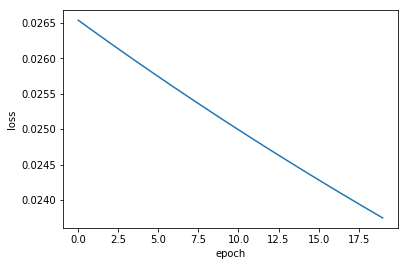

In [15]:
## Attempt 2 : Parametre optimisation using Gradient Descent 
alpha = 1
epochs = 20
N = y.shape[0]
losses = []
for i in range(epochs):
    # Forward pass
    z = X.dot(W) + b 
    A = sigmoid(z)
    
    # Calculate loss
    loss = bce_loss(y,A)
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
    
    # Calculate derivatives
    dz = (A - y)
    dW = 1/N * np.dot(X.T,dz)
    db = 1/N * np.sum(dz,axis=0,keepdims=True)    
    
    # Parameter updates#
    W -= alpha * dW
    b -= alpha * db

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()